# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__La base de donnée comprend des grains appartenant à trois variétés différentes de blé : Kama, Rosa et Canadian. La base contient 70 éléments pour chaque variété. Les variables sont quantitatives et sont les suivantes:__

- area (A): Superficie du grain
- perimeter (P): Périmètre
- compactness: Compacité
- length of kernel: longueur du noyau
- width of kernel: largeur du noyau 
- asymmetry coefficient: coefficient d'asymétrie 
- length of kernel groove: longueur de la rainure du noyau

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

"""
 For CPA
"""
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

"""
 For ACM
"""
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import cluster
from sklearn import metrics

In [2]:
# Import des données
data = pd.read_csv('Acp_classification_Data.csv')
data.head()

A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - 5.	Afficher le graphique des individus. Utiliser une couleur différente pour chaque classe de grains et analyser ?
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre      de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des grains qui composent chacune des classes.   

In [3]:
#1.
df=data
df.describe()

A           P           C          LK          WK      A_Coef  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

              LKG      target  
count  210.000000  210.000000  
mean     5.408071    1.000000  
std      0.491480    0.818448  
min      4.519000    0.000000  
25%      5.045000    0.000000  
50%      5.223000    1.000000  
75%      5.877000    2.000000  
max      6.550000    2.000000

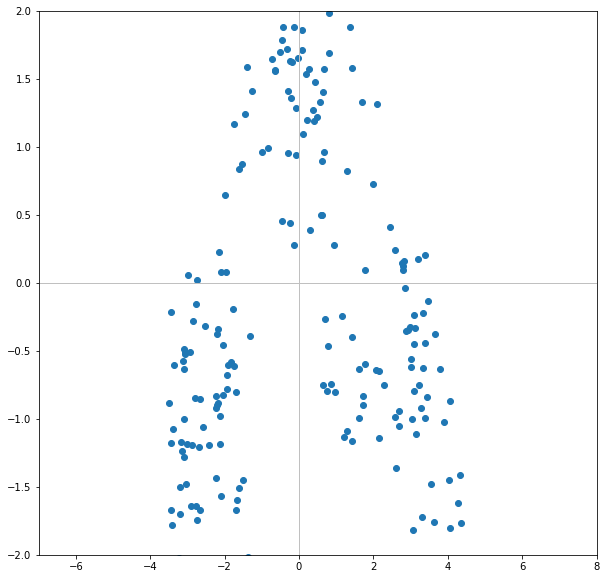

In [4]:
#2.
#1)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)

fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-7,8) #même limites en abscisse
axes.set_ylim(-2,2) #et en ordonnée
plt.scatter(principalComponents[:,0],principalComponents[:,1]) #axe 1 et 2
#ajouter les axes
plt.plot([-20,20],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-20,20],color='silver',linestyle='-',linewidth=1)

In [5]:
#2. 1) Valeur propre
variance = pca.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)  # valeur expliqué par deux composants



[5.18713606 1.69788054]


In [6]:
#Ration
ratio=pca.explained_variance_ratio_
print(ratio)
print( ratio[0]+ratio[1])


[0.64839201 0.21223507]
0.860627075150851


quantité d'information est préservée = 0.8606

In [7]:
#2.3)
pca = sklearnPCA()
principalComponents = pca.fit_transform(x)
variance = pca.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
eigval

array([5.18713606e+00, 1.69788054e+00, 6.79051624e-01, 3.69440974e-01,
       4.51347860e-02, 1.53349541e-02, 5.33084981e-03, 6.90210517e-04])

In [8]:
for i in range(8):
    print(sum(ratio[0:i]))

0
0.6483920080248546
0.860627075150851
0.860627075150851
0.860627075150851
0.860627075150851
0.860627075150851
0.860627075150851


In [9]:
# test des bâtons brisés
n = (pca.n_components_)
bk = 1/np.arange(n,0,-1) 
#print(bk) 1/n, 1/(n-1),...1
bk = np.cumsum(bk)
#print(bk) 1/n； 1/n + 1/(n-1)；1/n + 1/(n-1)+...+1
bk = bk[::-1] 
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    5.187136  2.717857
1    1.697881  1.717857
2    0.679052  1.217857
3    0.369441  0.884524
4    0.045135  0.634524
5    0.015335  0.434524
6    0.005331  0.267857
7    0.000690  0.125000


Il y a 2 dimension dont valeur propre est > 1, en plus,Selon les pourcentages des informations préservées, on trouve que si on prend les 2 premiers dimensions on peut conserver 86% d'information, qui est > 85% .
 Et avec le methode bâton brisé, pour les 2 premiers dimension,  Val.Propre > seuils donc on peut prendre les 2 premiere dimensions.

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
#Calculer les contributions et les qualités de représentation des individus
print('axe 1 et 2')
#Individus
di = np.sum(x**2,axis=1)
#cos2
coord=principalComponents
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
        
#Contribution
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(len(df.iloc[0,:])*eigval[j])
print('cos2_individus')
print(pd.DataFrame({'id':df.index,'COS_1':cos2[:,0],'COS_2':cos2[:,1]}))



axe 1 et 2
cos2_individus
      id     COS_1     COS_2
0      0  0.117516  0.631697
1      1  0.015027  0.886086
2      2  0.003871  0.841780
3      3  0.013550  0.920745
4      4  0.272600  0.695452
5      5  0.000415  0.950097
6      6  0.006196  0.657008
7      7  0.005028  0.937169
8      8  0.681800  0.092186
9      9  0.593878  0.371027
10    10  0.042310  0.077745
11    11  0.017100  0.946429
12    12  0.095520  0.552385
13    13  0.119469  0.730952
14    14  0.138592  0.726872
15    15  0.010832  0.516817
16    16  0.024983  0.288565
17    17  0.138413  0.808970
18    18  0.000848  0.842113
19    19  0.438617  0.318825
20    20  0.039953  0.387442
21    21  0.018907  0.788936
22    22  0.170623  0.774285
23    23  0.311087  0.582903
24    24  0.018156  0.617601
25    25  0.300665  0.573206
26    26  0.361508  0.443682
27    27  0.349254  0.448033
28    28  0.011063  0.918152
29    29  0.237505  0.347928
30    30  0.091650  0.659621
31    31  0.190550  0.404501
32    32  0.02701

In [12]:
print('CTR_individus')
print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

CTR_individus
      id     CTR_1     CTR_2
0      0  0.007926  0.130165
1      1  0.002100  0.378288
2      2  0.000582  0.386292
3      3  0.001939  0.402619
4      4  0.046116  0.359426
5      5  0.000045  0.314471
6      6  0.000272  0.088267
7      7  0.000459  0.261434
8      8  0.094336  0.038968
9      9  0.068133  0.130044
10    10  0.002004  0.011249
11    11  0.001835  0.310270
12    12  0.010158  0.179472
13    13  0.009647  0.180318
14    14  0.012534  0.200827
15    15  0.001349  0.196657
16    16  0.006048  0.213425
17    17  0.022698  0.405285
18    18  0.000212  0.643857
19    19  0.051264  0.113842
20    20  0.002290  0.067854
21    21  0.001067  0.136035
22    22  0.031940  0.442809
23    23  0.066035  0.378017
24    24  0.001759  0.182777
25    25  0.044879  0.261390
26    26  0.039031  0.146348
27    27  0.047514  0.186212
28    28  0.000769  0.194938
29    29  0.016308  0.072985
30    30  0.015542  0.341737
31    31  0.009106  0.059058
32    32  0.001509  0.014571


Selon le contribution, on voit que par exemple, le 202, 159 sont tres correle avec la premiere dimension. 
Selon le cos2 on peut voir que les individues comme 94 et 151 sont très bien présentés, car leur COS_1 + COS_2 sont plus grands par rapport au les autres individus comme 79 etc.

In [14]:
#Calculer les contributions et les qualités de représentation des variable
print('axe 1 et 2')
nbv=len(df.iloc[0,:])
#Variable
racine_eigval = np.sqrt(eigval)
corvar = np.zeros((nbv,nbv))
for k in range(nbv):
     corvar[:,k] = pca.components_[k,:] * racine_eigval[k]
#COS2_Variable
cos2var = corvar**2
print('COS2_Variable')
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))
#contributions
ctrvar = cos2var
for k in range(nbv):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]


axe 1 et 2
COS2_Variable
       id    COS2_1    COS2_2
0       A  0.983720  0.011092
1       P  0.966457  0.023351
2       C  0.427232  0.219707
3      LK  0.876323  0.068859
4      WK  0.951472  0.001511
5  A_Coef  0.101171  0.524133
6     LKG  0.689748  0.247582
7  target  0.191014  0.601647


In [15]:
#on n'affiche que pour les deux premiers axes
print('# # # # # # #')
print('CTR_Variable')
print(pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

# # # # # # #
CTR_Variable
       id     CTR_1     CTR_2
0       A  0.189646  0.006533
1       P  0.186318  0.013753
2       C  0.082364  0.129401
3      LK  0.168942  0.040556
4      WK  0.183429  0.000890
5  A_Coef  0.019504  0.308699
6     LKG  0.132973  0.145818
7  target  0.036825  0.354352


On voit que les variables : A,P, LK, WK sont très corrélés avec l'axe 1. C est corrélé avec l'axe 2.
A, P sont très bien présentés par le plan de ces 2 dimentions, car cos_1 + cos_2 sont proche de 1
A et P, A_Coef et target sont tres corrélé 

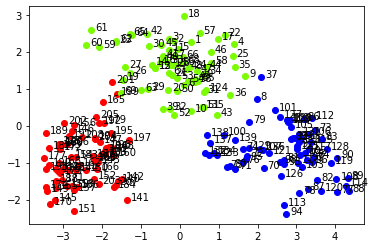

In [31]:
# 2.5
#positionnement des individus dans le premier plan
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(x)
#projeter dans le plan factoriel avec un code couleur différent selon le groupe
for couleur,k in zip(['red','blue','lawngreen'],[0,1,2]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
for i in range(210):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
plt.show()

Le classe rouge et le classe bleu sont inverse sur axe 1
Le classe vert sont inverse à classe rouge et classe bleu sur axe 2

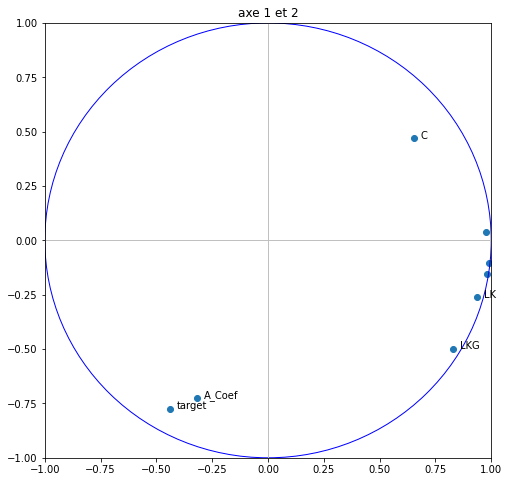

In [17]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(nbv):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('axe 1 et 2')
#affichage
plt.show()

# 3. Classification

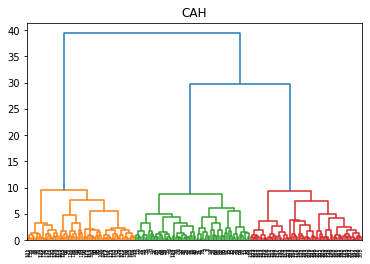

In [18]:
#3.1
#générer la matrice des liens
Z = linkage(x,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z)#,orientation='right',color_threshold=12)
#plt.rcParams['figure.figsize'] = (15.0, 4.0) # Colonne, ligne
plt.show()

Je veut séparer les données en 3 classes pour que les variabilité (inertie) intra-classe sont petite et le variabilité (inertie) inter-classe sont grande

In [19]:
#découpage à la hauteur t = 15 ==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=15,criterion='distance')
print(groupes_cah)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [20]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

cah = pd.DataFrame(data.index[idg],groupes_cah[idg])
cah

0
1  104
1  102
1  101
1  100
1   99
1   98
1   97
1   96
1   95
1   94
1   93
1   92
1   91
1   90
1   89
1   88
1   87
1   86
1   72
1   73
1   74
1   75
1   76
1   77
1  103
1   78
1   80
1   81
1   82
1   83
1   84
1   85
1   79
1  105
1  106
1  107
1  139
1  138
1  137
1  136
1  134
1  133
1  132
1  131
1  130
1  129
1  128
1  127
1  126
1  125
1   71
1   70
1  122
1  108
1  109
1  110
1  111
1  112
1  113
1  123
1  114
1  116
1  117
1  118
1  119
1  120
1  121
1  115
2  135
2  124
2    0
2   68
2   19
2   20
2   21
2   22
2   23
2   24
2   17
2   25
2   27
2   28
2   29
2   30
2   31
2   32
2   26
2   33
2   16
2   14
2   69
2    1
2    2
2    3
2    4
2    5
2   15
2    6
2    8
2    9
2   10
2   11
2   12
2   13
2    7
2   34
2   18
2   67
2   53
2   54
2   55
2   56
2   57
2   59
2   52
2   60
2   62
2   63
2   64
2   65
2   66
2   35
2   61
2   51
2   58
2   36
2   50
2   37
2   38
2   39
2   40
2   42
2   43
2   41
2   45
2   46
2   47
2   48
2   49
2   44
3  189
3  184
3  188
3  187
3  186
3  185
3  183
3  176
3  181
3  180
3  179
3  178
3  177
3  190
3  182
3  191
3  207
3  193
3  175
3  206
3  205
3  204
3  203
3  202
3  192
3  201
3  199
3  198
3  197
3  196
3  195
3  194
3  200
3  174
3  140
3  172
3  153
3  152
3  151
3  150
3  149
3  148
3  154
3  147
3  145
3  144
3  143
3  142
3  141
3  208
3  146
3  173
3  155
3  157
3  171
3  170
3  169
3  168
3  167
3  166
3  156
3  165
3  163
3  162
3  161
3  160
3  159
3  158
3  164
3  209

In [21]:
#3.2
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(x)
#index triés des groupes
print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     0
0  209
0  171
0  170
0  169
0  168
0  167
0  166
0  165
0  164
0  163
0  162
0  161
0  160
0  159
0  158
0  156
0  155
0  154
0  140
0  141
0  142
0  143
0  144
0  145
0  172
0  146
0  148
0  149
0  150
0  151
0  152
0  153
0  147
0  173
0  157
0  175
0  194
0  195
0  196
0  197
0  198
0  199
0  193
0  200
0  202
0  203
0  204
0  205
0  206
0  174
0  201
0  192
0  207
0  208
0  191
0  177
0  178
0  179
0  180
0  181
0  182
0  176
0  184
0  185
0  186
0  187
0  188
0  189
0  183
0  190
1  118
1  117
1  116
1  115
1  114
1  113
1  110
1  111
1  109
1  108
1  107

[0.54713411 0.54025282 0.54531099 0.4971133  0.49749671 0.47950741
 0.49165343 0.49396331 0.48915431 0.47866036 0.46466828 0.43382912
 0.48871357 0.4421259  0.45050453]


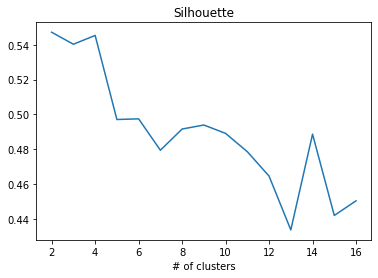

In [22]:
# 3.3silhouette
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(Z)
    res[k] = metrics.silhouette_score(Z,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupes le plus adapté au sens de la metric "silhouette" est 4. Car dans le graphe il a la valeur la plus élevée

In [23]:
#3.4

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2
row_0            
1       0  68   0
2       0   2  70
3      70   0   0

Il y bien correspondances entre les groupes proposés par la CAH et la méthode des K-means. Le premier groupes sont identiques, et il y a de fortes correspondances dans les autres.

In [24]:
#CLASS 1
classes=pd.DataFrame(data.index[idk],kmeans.labels_[idk])
c0=classes[classes.index == 0]
CL0=data[data.index.isin (c0.iloc[:,0])]
CL0.describe()

A          P          C         LK         WK     A_Coef  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean   11.873857  13.247857   0.849409   5.229514   2.853771   4.788400   
std     0.723004   0.340196   0.021760   0.138015   0.147516   1.336465   
min    10.590000  12.410000   0.808100   4.899000   2.630000   1.661000   
25%    11.262500  13.002500   0.834000   5.136250   2.725500   4.048750   
50%    11.835000  13.250000   0.849350   5.224000   2.834500   4.839000   
75%    12.425000  13.470000   0.861825   5.323750   2.967000   5.467250   
max    13.370000  13.950000   0.897700   5.541000   3.232000   8.456000   

             LKG  target  
count  70.000000    70.0  
mean    5.116400     2.0  
std     0.162068     0.0  
min     4.745000     2.0  
25%     5.002000     2.0  
50%     5.091500     2.0  
75%     5.228500     2.0  
max     5.491000     2.0

Classe 1 ont le plus petit Superficie du grain et Périmètre par rapport au les deux autres class


In [27]:
#CLASS 2
classes=pd.DataFrame(data.index[idk],kmeans.labels_[idk])
c1=classes[classes.index == 1]
CL1=data[data.index.isin (c1.iloc[:,0])]
CL1.describe()

A          P          C         LK         WK     A_Coef  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean   18.367714  16.154143   0.883191   6.162957   3.678857   3.617086   
std     1.389163   0.584107   0.015454   0.240461   0.185179   1.199509   
min    15.380000  14.890000   0.845200   5.718000   3.231000   1.472000   
25%    17.330000  15.737500   0.872525   5.984500   3.554250   2.838500   
50%    18.720000  16.210000   0.882300   6.148500   3.693500   3.572500   
75%    19.137500  16.557500   0.897500   6.312000   3.804750   4.436000   
max    21.180000  17.250000   0.910800   6.675000   4.033000   6.682000   

             LKG     target  
count  70.000000  70.000000  
mean    6.031714   0.971429  
std     0.229761   0.167802  
min     5.484000   0.000000  
25%     5.877500   1.000000  
50%     5.981500   1.000000  
75%     6.187750   1.000000  
max     6.550000   1.000000

Classe 2 ont le plus grand Superficie du grain et Périmètre par rapport au les deux autres class

In [26]:
#CLASS 3
classes=pd.DataFrame(data.index[idk],kmeans.labels_[idk])
c3=classes[classes.index == 2]
CL3=data[data.index.isin (c3.iloc[:,0])]
CL3.describe()

A          P          C         LK         WK     A_Coef  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean   14.301000  14.275857   0.880396   5.493129   3.243186   2.695117   
std     1.160495   0.549916   0.016298   0.218779   0.174384   1.178744   
min    11.230000  12.630000   0.839200   4.902000   2.850000   0.765100   
25%    13.750000  13.960000   0.868850   5.378000   3.134250   1.826500   
50%    14.355000  14.320000   0.881450   5.518000   3.243500   2.637500   
75%    15.045000  14.677500   0.892000   5.661000   3.378500   3.363750   
max    16.440000  15.270000   0.918300   5.884000   3.582000   6.685000   

             LKG     target  
count  70.000000  70.000000  
mean    5.076100   0.028571  
std     0.244806   0.167802  
min     4.519000   0.000000  
25%     4.924500   0.000000  
50%     5.094000   0.000000  
75%     5.221500   0.000000  
max     5.533000   1.000000

Classe 3 ont le plus petit coefficient d'asymétrie